In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm import tqdm_notebook as tqdm
import warnings;warnings.simplefilter('ignore')
import os
root = '../data/phase_2/raw/PROII20200310/'
os.listdir(root)

['Aroma-1 Unit 000_Simulation Results for AI Training_List.xlsx',
 'Aroma-1 Unit 000_Simulation Results for AI Training_Rerun Check.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_001_050_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_051_100_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_101_150_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_151_200_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_201_250_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_251_300_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_301_350_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_351_400_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_401_450_Yu Final.xlsx',
 'Aroma-1_Unit_000_Simulation_Results_Rerun_451_500_Yu Final.xlsx']

In [2]:
os.listdir('../data/phase_2/cleaned/')

['col_names.pkl', 'train(energy).csv', 'train.csv']

In [3]:
col_names = joblib.load('../data/phase_2/cleaned/col_names.pkl')
col_names.keys()

dict_keys(['xna', 'xle', 'xhc', 'xhe', 'fna', 'fle', 'fhc', 'fhe', 'sle', 'shc', 'she', 'case', 'duty', 'Rate_m3', 'Rate_ton'])

In [4]:
excel_list = os.listdir(root)[2:]

In [5]:
def get_col(df,name):
    return df.columns[df.columns.str.contains(name)].tolist()

In [6]:
def parse_sheet_name(file_name):
    start,end = int(file_name.split('_')[-3]),int(file_name.split('_')[-2])
    return [str(i).zfill(3) for i in range(start,end+1)]

In [7]:
def clean_data(df):
    df = df.T.reset_index()
    idx = df.iloc[5:,1].values
    df = df.iloc[:,9:-6]
    prefix = pd.Series(df.iloc[1,:].values).fillna(method='ffill').values
    middle = df.iloc[2,:].values
    suffix = df.iloc[3,:].values
    col = [p.strip() + '_' + m.strip() + '_' + s.strip() for p,m,s in zip(prefix,middle,suffix)]
    df = df.iloc[5:,:]
    df.index = idx
    df.columns = col
    return df.astype('float')

In [8]:
temp = clean_data(pd.read_excel(root+excel_list[0],sheet_name='001'))
print(temp.shape,temp.isnull().sum().sum())
temp.head()

(33, 274) 0


,Case Conditions_Feed Rate to C013 (Input)_m3/hr,Case Conditions_C7+ in Light End (Input)_wt%,Case Conditions_Heart Cut Prod. Rate (Input)_m3/hr,Case Conditions_C6P- in Heart Cut (Input)_wt%,Case Conditions_Feed Rate to C013 (Results)_m3/hr,Case Conditions_C7+ in Light End (Results)_wt%,Case Conditions_Heart Cut Prod. Rate (Results)_m3/hr,Case Conditions_C6P- in Heart Cut (Results)_wt%,Case Conditions_C10+ in Heart Cut (Results)_wt%,Naphtha Properties_Naphtha Feed Rate_m3/hr,...,Heavy End Product Properties_3-Methylnonane_wt%,Heavy End Product Properties_tert-Butylcyclohexane_wt%,Heavy End Product Properties_n-Decane_wt%,"Heavy End Product Properties_1,2-Diethylbenzene_wt%",Heavy End Product Properties_n-Undecane_wt%,Heavy End Product Properties_n-Pentylbenzene_wt%,Heavy End Product Properties_n-Dodecane_wt%,Heavy End Product Properties_n-Hexylbenzene_wt%,Heavy End Product Properties_n-Tridecane_wt%,Heavy End Product Properties_Overall_wt%
001-01,10.0,2.5,100.0,1.0,10.000001,2.500057,100.000198,1.000427,6.138641,118.000084,...,13.956123,2.497176,5.281883,3.507996,1.090498,0.220558,0.020529,0.041371,0.0,99.999993
001-02,10.0,5.0,100.0,1.0,10.000001,4.999882,100.000122,1.000401,6.249050,118.000000,...,14.167476,2.535975,5.369976,3.569902,1.111782,0.224973,0.020956,0.042241,0.0,100.000002
001-03,10.0,10.0,100.0,1.0,10.000001,10.000006,100.000008,0.999993,6.376052,118.000000,...,14.722088,2.637226,5.594396,3.724859,1.163364,0.235584,0.021969,0.044298,0.0,99.999983
001-04,10.0,2.5,100.0,1.5,10.000001,2.500020,100.000275,1.500293,6.316332,118.000000,...,12.408690,2.216235,4.679968,3.101526,0.961640,0.194369,0.018078,0.036421,0.0,100.000004
001-05,10.0,5.0,100.0,1.5,10.000001,5.000001,99.999817,1.499961,6.416863,118.000084,...,12.534007,2.239314,4.732872,3.139065,0.974726,0.197096,0.018343,0.036962,0.0,99.999999


In [9]:
duty = get_col(temp,'Duty')
duty

['Duty_E062 3.5K Steam Rate_ton/hr',
 'Duty_Condenser Heat Duty_Mkcal/hr',
 'Duty_Reboiler Heat Duty_Mkcal/hr']

In [10]:
Rate_m3 = get_col(temp,'Rate_m3')[-3:]
Rate_m3

['Light End Product Properties_Light End Prod. Rate_m3/hr',
 'Heart Cut Product Properties_Heart Cut Prod. Rate_m3/hr',
 'Heavy End Product Properties_Heavy End Product Rate_m3/hr']

In [11]:
Rate_ton = get_col(temp,'Rate_ton')[-3:]
Rate_ton

['Light End Product Properties_Light End Prod. Rate_ton/hr',
 'Heart Cut Product Properties_Heart Cut Prod. Rate_ton/hr',
 'Heavy End Product Properties_Heavy End Product Rate_ton/hr']

In [12]:
col_names['duty'] = duty
col_names['Rate_m3'] = Rate_m3
col_names['Rate_ton'] = Rate_ton

In [13]:
joblib.dump(col_names,'../data/phase_2/cleaned/col_names.pkl')
print('save done')

save done


In [14]:
temp = temp[col_names['case']+col_names['xna']+duty+Rate_m3+Rate_ton]
temp.shape

(33, 67)

# for loop load all data

In [15]:
train = pd.DataFrame(columns=temp.columns)
for file_name in tqdm(excel_list):
    data = pd.read_excel(root+file_name,sheet_name = None)
    sheet_names = parse_sheet_name(file_name)
    for i in sheet_names:
        rows = clean_data(data.get(i))
        rows = rows[temp.columns]
        train = train.append(rows)

(16526, 67)


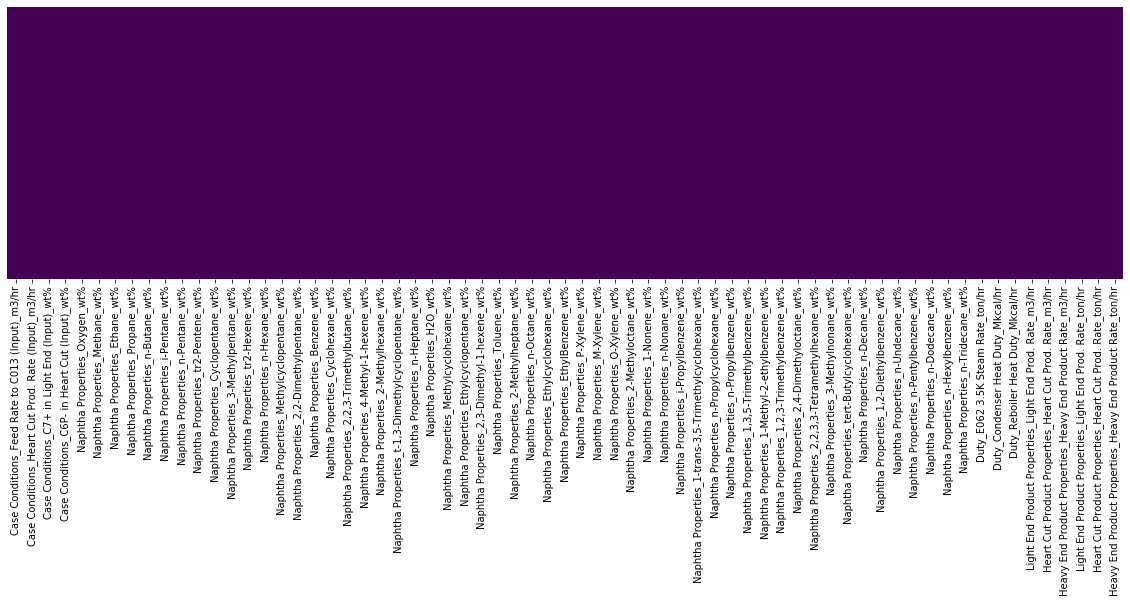

In [16]:
print(train.shape)
fig = plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train.to_csv('../data/phase_2/cleaned/train(energy).csv')